<a href="https://colab.research.google.com/github/mayankjain281/ML_Daily_Practice_And_Revision/blob/main/ML_Daily_Practice_%26_Revision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22/6/23 Libraries

Al in one hypothesis code

https://github.com/mayankjain281/One-function-for-all-Hypothesis-tests/blob/main/All_in_one_code_for_Hypothesis_testing.ipynb

hypothesis tests cheatsheet

https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from scipy.stats import normaltest, shapiro, kstest, describe, skew, kurtosis, levene, probplot
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, f_oneway, kruskal, pearsonr, spearmanr

In [ ]:
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# 25/06/23

In this step-by-step tutorial you will:

- Download and install Python SciPy and get the most useful package for machine learning in Python.
- Load a dataset and understand it's structure using statistical summaries and data visualization.
- Create 6 machine learning models, pick the best and build confidence that the accuracy is reliable.

The best small project to start with on a new tool is the classification of iris flowers (e.g. the iris dataset).
This is a good project because it is so well understood.

- Attributes are numeric so you have to figure out how to load and handle data.
- It is a classification problem, allowing you to practice with perhaps an easier type of supervised learning algorithm.
- It is a multi-class classification problem (multi-nominal) that may require some specialized handling.
- It only has 4 attributes and 150 rows, meaning it is small and easily fits into memory (and a screen or A4 page).
- All of the numeric attributes are in the same units and the same scale, not requiring any special scaling or transforms to get started.

In [ ]:
# load the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [ ]:
# Load the dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(url, names=names)

In [ ]:
# Explore the dataset

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Clean the dataset

df[df.duplicated()]
df.drop_duplicates(inplace=True)

In [ ]:
# Summarize the dataset

df.describe().round(2)

,sepal-length,sepal-width,petal-length,petal-width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [ ]:
# split out dataset

array = df.values
X = array[:,:4]
y = array[:,[-1]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=1)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train,y_train.ravel())
y_pred = knn.predict(X_test)
classification_report(y_test,y_pred,target_names=list(df['class'].unique()))

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00         9\nIris-versicolor       1.00      0.92      0.96        13\n Iris-virginica       0.89      1.00      0.94         8\n\n       accuracy                           0.97        30\n      macro avg       0.96      0.97      0.97        30\n   weighted avg       0.97      0.97      0.97        30\n'

In [ ]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica'],
      dtype=object)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 9,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  8]])

In [ ]:
knn.score(X_test, y_test)

0.9666666666666667

In [ ]:
accuracy_score(y_test,y_pred)

0.9666666666666667

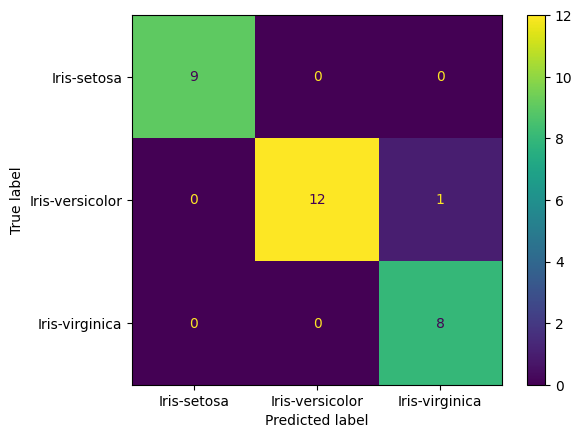

In [ ]:
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=list(df['class'].unique()))

cm_display.plot()
plt.show()

#27/06/23

https://www.kaggle.com/datasets/rakeshrau/social-network-ads/code

https://www.analyticsvidhya.com/blog/2021/01/a-quick-introduction-to-k-nearest-neighbor-knn-classification-using-python/


In [ ]:
url = "https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv"
df = pd.read_csv(url)
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.drop("User ID", axis=1, inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include="all").round(2)

,Gender,Age,EstimatedSalary,Purchased
count,400,400.00,400.00,400.00
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,204,NaN,NaN,NaN
mean,NaN,37.66,69742.50,0.36
std,NaN,10.48,34096.96,0.48
min,NaN,18.00,15000.00,0.00
25%,NaN,29.75,43000.00,0.00
50%,NaN,37.00,70000.00,0.00
75%,NaN,46.00,88000.00,1.00


In [ ]:
np.log(df['EstimatedSalary']).describe()

count    400.000000
mean      11.015174
std        0.555707
min        9.615805
25%       10.668955
50%       11.156251
75%       11.385092
max       11.918391
Name: EstimatedSalary, dtype: float64

In [ ]:
np.log(np.e)

1.0

In [ ]:
np.log([1, np.e, np.e**2])

array([0., 1., 2.])

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

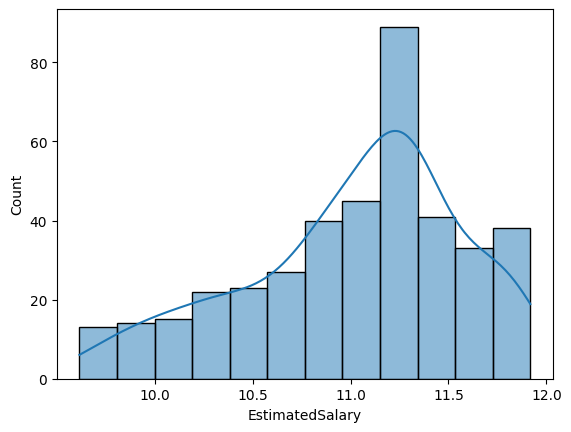

In [ ]:
import seaborn as sns

sns.histplot(np.log(df['EstimatedSalary']), kde=True)

<Axes: xlabel='Age', ylabel='Count'>

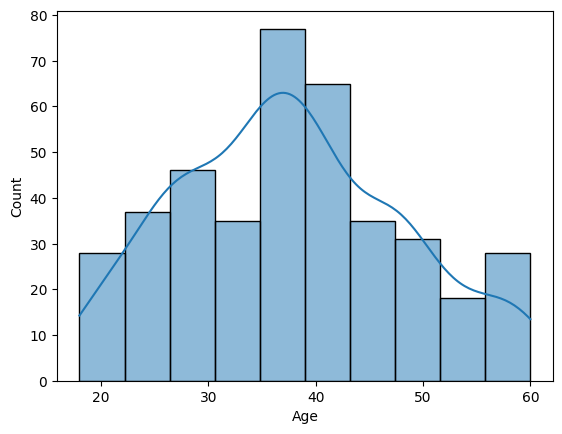

In [ ]:
sns.histplot(df['Age'], kde=True)

<Axes: xlabel='Gender', ylabel='count'>

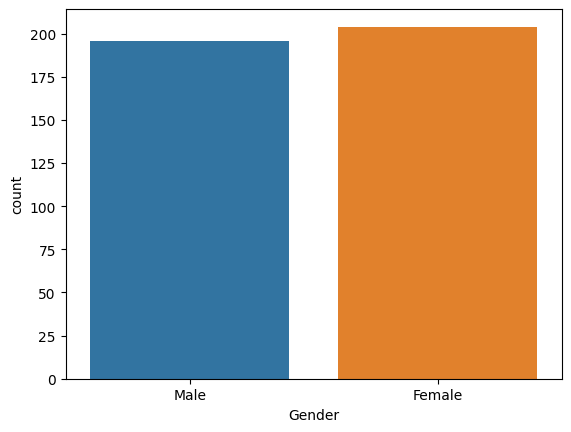

In [ ]:
sns.countplot(x=df['Gender'])

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,[-1]].values

In [ ]:
#Since our dataset containing character variables we have to encode it using LabelEncoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
mb

In [ ]:
print("life is awesome")

life is awesome
